### Cutomer Churn Prediction

In [106]:
# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [107]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')


In [108]:
columns = dataset.columns

In [109]:
columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [110]:
X = dataset[['CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']]
y = dataset[['Exited']]

In [111]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [112]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [113]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [114]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [115]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [116]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)


In [117]:
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [118]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

In [119]:
X.shape

(10000, 11)

In [120]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [121]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [122]:
X_train.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Germany', 'Spain', 'Male'],
      dtype='object')

In [123]:
X_test.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Germany', 'Spain', 'Male'],
      dtype='object')

In [124]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[X_train.columns] = sc.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = sc.transform(X_test[X_test.columns])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

In [125]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
7389,0.169582,-0.464608,0.006661,-1.215717,0.809503,0.642595,-1.032270,1.106432,-0.569844,1.743090,-1.091687
9275,-2.304559,0.301026,-1.377440,-0.006312,-0.921591,0.642595,0.968738,-0.748664,1.754865,-0.573694,0.916013
2995,-1.191196,-0.943129,-1.031415,0.579935,-0.921591,0.642595,-1.032270,1.485335,-0.569844,-0.573694,-1.091687
5316,0.035566,0.109617,0.006661,0.473128,-0.921591,0.642595,-1.032270,1.276528,-0.569844,1.743090,0.916013
356,2.056114,1.736588,1.044737,0.810193,0.809503,0.642595,0.968738,0.558378,-0.569844,1.743090,-1.091687
...,...,...,...,...,...,...,...,...,...,...,...
9225,-0.582970,-0.656016,-0.339364,0.703104,0.809503,0.642595,0.968738,1.091330,1.754865,-0.573694,-1.091687
4859,1.478815,-1.613058,-0.339364,0.613060,-0.921591,0.642595,0.968738,0.131760,-0.569844,1.743090,-1.091687
3264,0.901515,-0.368904,0.006661,1.361474,0.809503,0.642595,-1.032270,1.412320,-0.569844,-0.573694,0.916013
9845,-0.624205,-0.081791,1.390762,-1.215717,0.809503,0.642595,0.968738,0.844321,-0.569844,1.743090,-1.091687


In [126]:
import tensorflow
print(tensorflow.__version__)

2.0.0


In [127]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [128]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 10,kernel_initializer='he_uniform',activation='relu',input_dim = 11))

# Adding the second hidden layer
classifier.add(Dense(units = 10, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [129]:
classifier.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 10)                120       
_________________________________________________________________
dense_10 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 11        
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


In [131]:
X_train.shape

(8000, 11)

In [134]:
from tensordash.tensordash import Tensordash
histories = Tensordash(
    ModelName = 'Any_name',
    email = 'your_email@gmail.com')

Enter Tensordash Password :········


In [135]:
classifier.fit(X_train, y_train, epochs = 15, validation_data =(X_test,y_test),batch_size = 100,callbacks = [histories])

Train on 8000 samples, validate on 2000 samples
Epoch 1/15
8000/8000 [==============================] - 1s 166us/sample - loss: 0.3447 - accuracy: 0.8555 - val_loss: 0.3498 - val_accuracy: 0.8575
Epoch 2/15
8000/8000 [==============================] - 1s 171us/sample - loss: 0.3439 - accuracy: 0.8565 - val_loss: 0.3490 - val_accuracy: 0.8560
Epoch 3/15
8000/8000 [==============================] - 1s 174us/sample - loss: 0.3427 - accuracy: 0.8568 - val_loss: 0.3480 - val_accuracy: 0.8570
Epoch 4/15
8000/8000 [==============================] - 1s 185us/sample - loss: 0.3419 - accuracy: 0.8568 - val_loss: 0.3474 - val_accuracy: 0.8595
Epoch 5/15
8000/8000 [==============================] - 1s 173us/sample - loss: 0.3410 - accuracy: 0.8577 - val_loss: 0.3462 - val_accuracy: 0.8615
Epoch 6/15
8000/8000 [==============================] - 1s 184us/sample - loss: 0.3405 - accuracy: 0.8590 - val_loss: 0.3464 - val_accuracy: 0.8590
Epoch 7/15
8000/8000 [==============================] - 2s 195us

In [24]:
# # Fitting the ANN to the Training set
# model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 100,epochs = 100,callbacks = [histories])

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


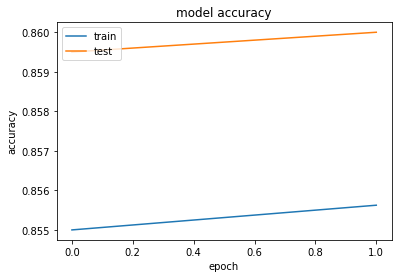

In [74]:
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

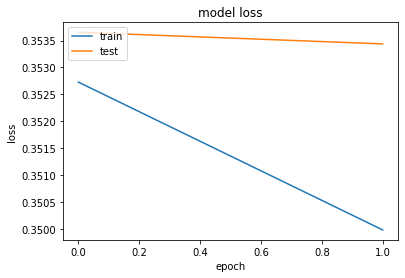

In [75]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()